In [9]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [4]:
with h5py.File('data/Spectrum.h5', 'r') as ipt:
    print(ipt.keys())
    Spec = ipt['Spectrum'][...]

<KeysViewHDF5 ['Spectrum']>


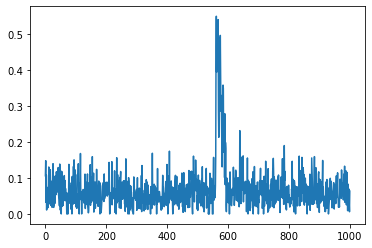

In [31]:
light_curve = Spec[:, 0]
T = np.arange(1000)

plt.plot(T, light_curve)

In [76]:
def cal_density(id_time, virgin_curve, sigma=1):
    '''
    移植来源：PID2,time_sequence.ipynb
    '''
    _Time = np.arange(virgin_curve.size)
    return np.sum(np.exp(- ((np.expand_dims(id_time, 1) - _Time) ** 2) / (2 * (sigma ** 2))) / \
                  (np.sqrt(2 * np.pi) * sigma) * \
                    np.expand_dims(light_curve, 0), axis=1)

In [64]:
# 调试部分
_Time = np.arange(light_curve.size)
id_time = np.array([1,2,3])
sigma = 1
np.sum(np.exp(- ((np.expand_dims(id_time, 1) - _Time) ** 2) / (2 * (sigma ** 2))) \
                  / (2 * np.pi * sigma) * np.expand_dims(light_curve, 0), axis=1)

array([0.03914906, 0.032347  , 0.02626108])

68.22390045563519
68.061520764055


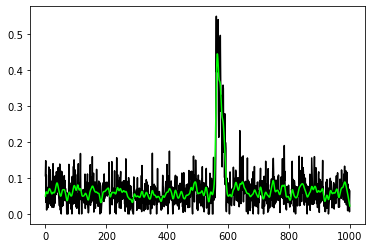

In [87]:
light_curve_plus = cal_density(T, light_curve, 3)


plt.plot(T, light_curve, 'black')
plt.plot(T, light_curve_plus, 'lime')
print(light_curve.sum())
print(light_curve_plus.sum())